# Recurso Educativo - Circuito Cuántico Variacional
## ¿Qué es un circuito cuántico variacional?
A diferencia de los circuitos clásicos que manejan bits clásicos (0 o 1) y la información está contenida en bits independientes, los circuitos cuánticos operan con qubits, los qubits pueden estar correlacionados de manera que el estado de uno dependa del estado del otro.

Un circuito cuántico está compuesto por una serie de puertas cuánticas que manipulan los qubits. Estas puertas cuánticas pueden realizar transformaciones en los estados de los qubits y crear entrelazamiento cuántico.


Los **circuitos cuánticos variables** contienen parámetros ajustables que permiten adaptar el comportamiento del circuito. Estos parámetros se pueden ajustar para optimizar el rendimiento del circuito en tareas específicas. Un componente fundamental de esta disciplina es el concepto de **Circuito Cuántico Variacional (VQC)**.

En esencia, un Circuito Cuántico Variacional es un conjunto de operaciones cuánticas, un circuito cuántico, con parámetros ajustables. Estos parámetros son los "nudos" del circuito, y su optimización nos permite encontrar soluciones a problemas específicos.

En la imagen vemos el ejemplo de un Circuito Cuantico Variacional de 6 qubits.


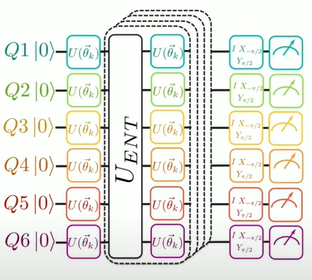

In [25]:
Image('ejemplo_VQE.png')

Image from: "Variational Quantum Eigensolver | Qiskit Global Summer School 2023"
(https://www.youtube.com/watch?v=AhEnvYgoA34)

## Código de Ejemplo
Vamos a sumergirnos en un ejemplo práctico utilizando la biblioteca PennyLane en Python. El código proporcionado es un esqueleto para un **Circuito Cuantico Variacional (VQC)** que busca minimizar el valor de expectación de un Hamiltoniano dado.

In [ ]:
def variational_circuit(params,hamiltonian):
  #Los parametros en los base a los cuales se optimizara el circuito
    parameters = params.reshape((LAYERS, WIRES, 3))
    qml.templates.StronglyEntanglingLayers(parameters, wires=range(WIRES))
    #la funcion expval nos devuelve el valor de expetacion del hamiltoniano con los parametros que le brindemos
    return qml.expval(qml.Hermitian(hamiltonian, wires = [0,1]))

Aquí, **variational_circuit** toma una serie de parámetros ajustables y un Hamiltoniano como entrada, realizando operaciones cuánticas en un circuito que intenta minimizar la expectativa del Hamiltoniano.

### Entrelazamiento entre qubits
Las Capas de Entrelazamiento Fuerte (StronglyEntanglingLayers) es una función de PennyLane que se encarga de entrelazar a los qubits, a esta función le pasamos los parametros a optimizar, ya que de este entrelazaimento dependera el valor esperado de nuestro hamiltoniano(función de costo).
La imagen muestra un ejemplo de un entrelazamiento fuerte de 4 qubits.


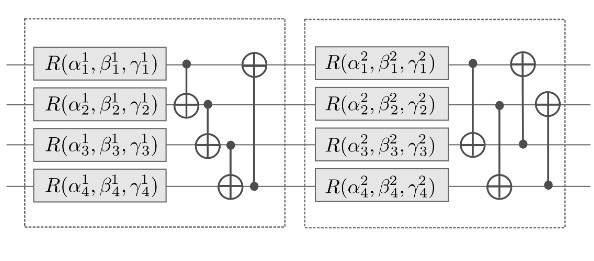

In [24]:
from IPython.display import Image
Image('ejemplo_entrelazamiento.jpeg')

## Optimización del Circuito
La función **optimize_circuit** utiliza un dispositivo cuántico simulado y un optimizador para ajustar los parámetros del circuito de manera que minimice la expectativa del Hamiltoniano.

In [ ]:
def optimize_circuit(hamiltonian):
  #Definimos nuestro hamiltoniano de manera que sea una matriz
    hamiltonian = np.array(hamiltonian, requires_grad = False)
    hamiltonian = np.array(hamiltonian,float).reshape((2 ** WIRES), (2 ** WIRES))
  #Definimos el dispositivo que se simulará
    dev = qml.device("default.qubit", wires = WIRES)# Inicializamos el dispositivo, dando el tipo de qubits que queremos y el numero de qubits.
  #Generamos valores aleatorios para los parametros
    w = qml.numpy.random.rand(NUM_PARAMETERS)

    @qml.qnode(dev)
    #Esta funcion cost es equivalente al valor de expectacion del hamiltoniano, simplemente la evaluamos en los parametros aleatorios
    def cost(wei):
        return variational_circuit(wei,hamiltonian)

    opt=qml.GradientDescentOptimizer(stepsize=0.3)
# Numero de iteraciones que hara la optimización
    steps = 160
# Valores de los parámetros que pasaremos
    params = w

    for i in tqdm(range(steps)):
        # update the circuit parameters
        params = opt.step(cost, params)

        if (i + 1) % 10 == 0:
            print("Cost after step {:5d}: {: .8f}".format(i + 1, cost(params)))

## Optimizador - Gradiente Descendiente(Gradent Descent Optimizer)
El **gradiente descendiente** es un algoritmo de optimización ampliamente utilizado para encontrar mínimos locales de funciones. El **gradiente descendiente** se aplica para ajustar los parámetros del circuito cuántico con el objetivo de minimizar una función de costo, que en este caso es valor de expectación del Hamiltoniano.

PennyLane facilita la optimización de funciones cuánticas al proporcionar optimizadores compatibles. El optimizador puede calcular automáticamente el gradiente(derivada) de la función de costo(valor de expectacion del hamiltoniano) con respecto a los parámetros del circuito cuántico. Esto con el objetivo de encontrar el minímo de la función de costo(valor de expectación del hamiltoniano), o lo que es equivalente, buscar los parámetros donde la derivada de la función sea igual a 0.
## Valores de Ejemplo
A continuación mostramos valores de ejemplo que se pueden probar en este ejemplo en particular, estos valores de ejemplo son los coeficientes del Hamiltoniano.

Los últimos 2 renglones de la siguiente celda, es donde hacemos todo el proceso del circuito cuántico variacional, probamos el circuito cuántico para 2 hamiltonianos distintos, in1 e in2.

In [ ]:
#Coeficientes del Hamiltoniano
in1=np.array([0.863327072347624,0.0167108057202516,0.07991447085492759,0.0854049026262154,
              0.0167108057202516,0.8237963773906136,-0.07695947154193797,0.03131548733285282,
              0.07991447085492759,-0.07695947154193795,0.8355417021014687,-0.11345916130631205,
              0.08540490262621539,0.03131548733285283,-0.11345916130631205,0.758156886827099])
#Valor esperado del Hamiltoniano: 0.61745341
#Coeficientes del hamiltoniano
in2=np.array([0.32158897156285354,-0.20689268438270836,0.12366748295758379,-0.11737425017261123,
              -0.20689268438270836,0.7747346055276305,-0.05159966365446514,0.08215539696259792,
              0.12366748295758379,-0.05159966365446514,0.5769050487087416,0.3853362904758938,
              -0.11737425017261123,0.08215539696259792,0.3853362904758938,0.3986256655167206])
#Valor esperado del hamiltoniano: 0.00246488
optimize_circuit(in1)
optimize_circuit(in2)

El objetivo del Circuito Cuantico Variacional es encontrar los parámetros del circuito que minimizan la el valor de expectación de estos Hamiltonianos.

Con esta breve introducción, hemos establecido los conceptos básicos del Circuito Cuántico Variacional y proporcionado un punto de partida práctico con el código en Python. Explora, ajusta los parámetros y observa cómo el circuito cuántico evoluciona para minimizar la función de costo asociada al Hamiltoniano.